<a href="https://colab.research.google.com/github/sathishk951/Hotel-booking-data-analysis/blob/main/Sathish_Kumar(Hotel_Booking)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data="/content/drive/MyDrive/project/hotel booking/Copy of Hotel Bookings.csv"
da=pd.read_csv(data)
da

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
da.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#replacing all NaN values in 'children' with 0,considering agent as 0 because they might book without agent
#replaced the value of null country with highest country name
da.fillna({'children':0,'agent':0,'country':'PRT'}, inplace=True)
da
#company column had been dropped.
da.drop(['company'],axis=1,inplace=True)

In [ ]:
#examine the dataset
(da[['hotel','is_canceled','lead_time','arrival_date_year',
      'arrival_date_month','arrival_date_week_number',
      'arrival_date_day_of_month','stays_in_weekend_nights',
      'stays_in_week_nights','adults', 'children','babies','meal',
      'country','market_segment','distribution_channel',
      'is_repeated_guest','previous_cancellations',
      'previous_bookings_not_canceled','reserved_room_type',
      'assigned_room_type','booking_changes','deposit_type','agent',
      'days_in_waiting_list','customer_type','adr',
      'required_car_parking_spaces','total_of_special_requests',
      'reservation_status','reservation_status_date']].describe())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
da.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
Questions for Analysis
# 1.what type of hotel and their reservation count.
# 2.what type of hotel and their reservation cancelation count.
# 3.Which countries do the guests come from.
# 4.How many repeated guest for each hotel.
# 5.corelation matrix.
# 6.How many guest arrived in each month to find the peak month.
# 7.What percentage guest prefer meals or some special aminities.
# 8.Which type of custemer cancelled the room most.

SyntaxError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


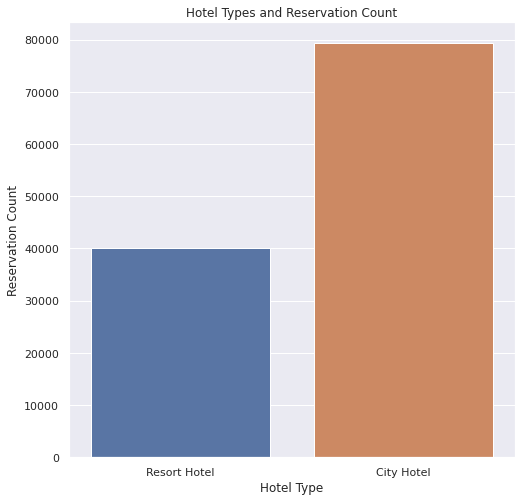

In [ ]:
# details of city hotel and a resort hotel
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.countplot('hotel', data = da)
graph.set(title='Hotel Types and Reservation Count')
graph.set_xlabel('Hotel Type')
graph.set_ylabel('Reservation Count')
plt.show()
#da.hotel.value_counts(normalize=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


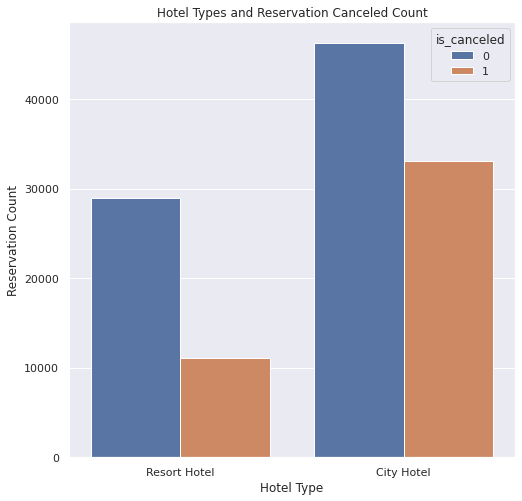

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
graph = sns.countplot('hotel', hue='is_canceled', data=da)
graph.set(title='Hotel Types and Reservation Canceled Count')
graph.set_xlabel('Hotel Type')
graph.set_ylabel('Reservation Count')
plt.show()
da.is_canceled.value_counts(normalize=True)
#cancellation ratio occurs more in city hotels

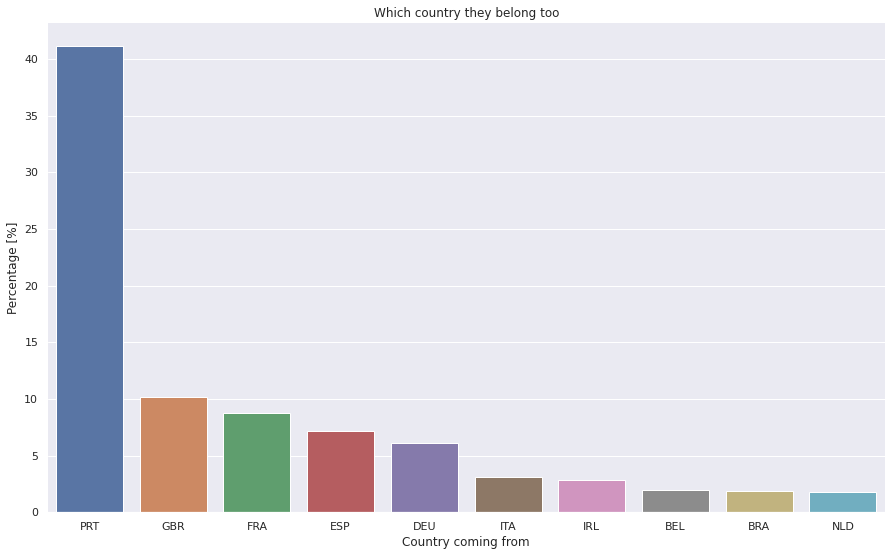

In [ ]:
# get the total number of hotel guests
total_guests = da['country'].value_counts().sum()
# a df for counting the number of guests based on country
country = pd.DataFrame(da['country'].value_counts().head(10))
# rename a column
country.rename(columns={"country": "number_of_guest"}, inplace=True)
# add the proportion column
country['percentage'] = round(country['number_of_guest'] / total_guests * 100, 2)
# add the country column
country["country"] = country.index
# bar chart: where most tourists come from (top 10)
plt.figure(figsize=(15,9))
sns.barplot(data=country,x='country',y='percentage')
plt.ylabel("Percentage [%]")
plt.xlabel('Country coming from')
plt.title('Which country they belong too')
sns.despine(left=True)

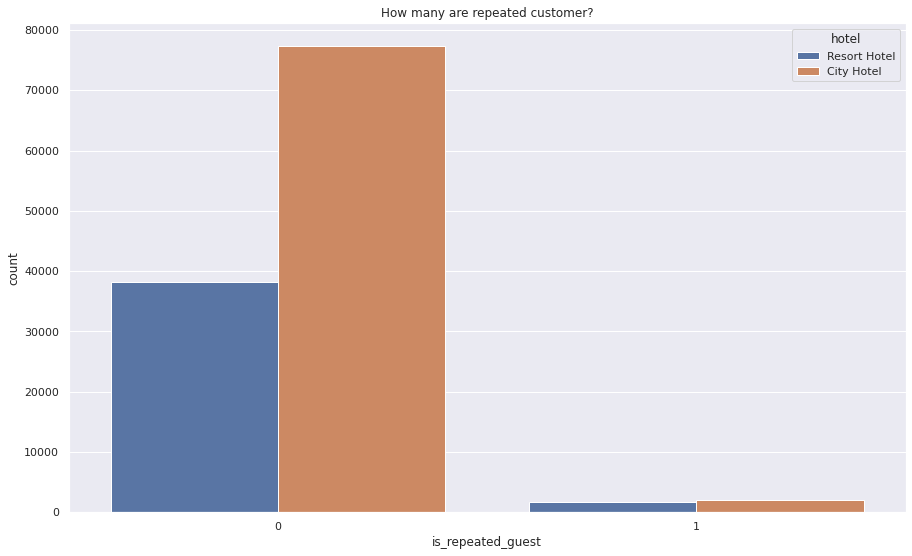

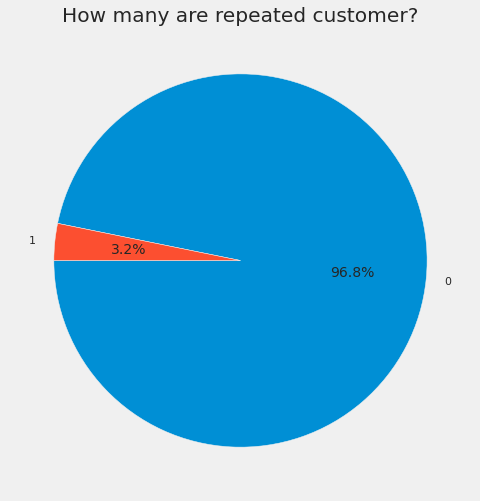

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(data=da,x='is_repeated_guest', hue='hotel')
plt.title('How many are repeated customer?')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.title('How many are repeated customer?')
g = plt.pie(da.is_repeated_guest.value_counts(), labels=da.is_repeated_guest.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()
#from this we come to conclude that,very less amount of repeated coustomer booking rooms at same hotel.

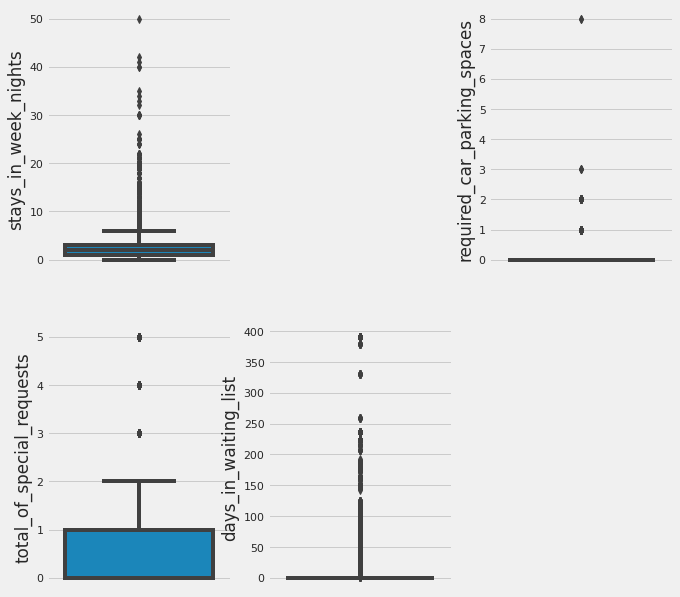

In [ ]:
from pylab import *
f, ax = plt.subplots(figsize=(10, 10))
subplot(2,3,1)
sns.boxplot(y = da['stays_in_week_nights'])

subplot(2,3,3)
sns.boxplot(y = da['required_car_parking_spaces'])

subplot(2,3,4)
sns.boxplot(y = da['total_of_special_requests'])

subplot(2,3,5)
sns.boxplot(y = da['days_in_waiting_list'])

plt.show()

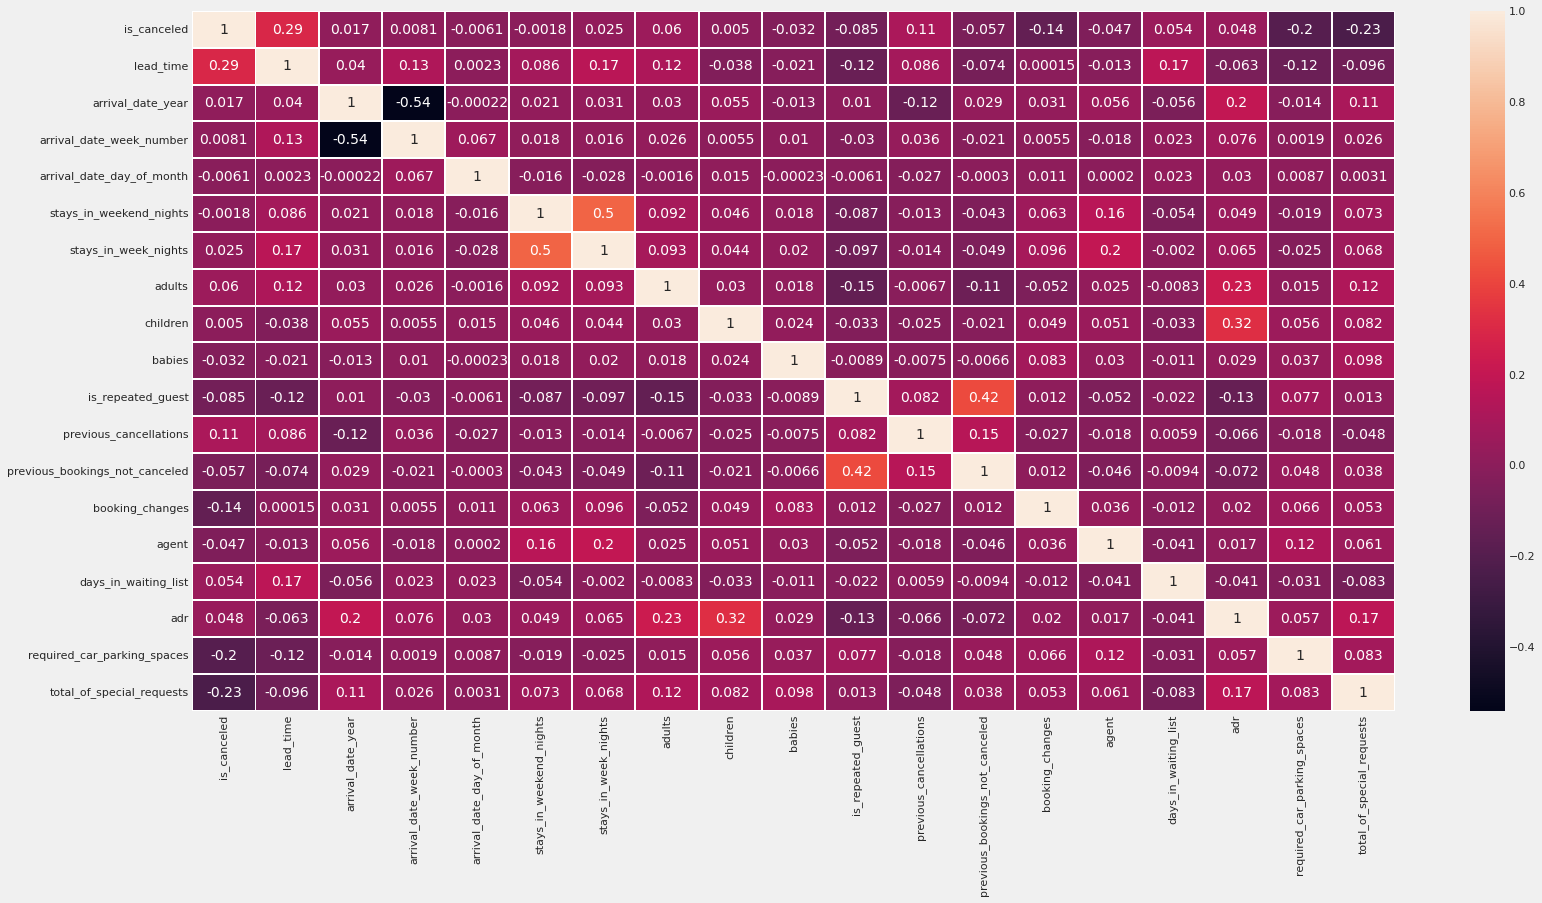

In [ ]:
#heat map to look for the correlated attributes
plt.figure(figsize = (24, 12))
corr = da.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()
#Since there are no correlated columns that their correlation are greater than 0.8 or less than -0.8 We're not removing nor dropping and columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


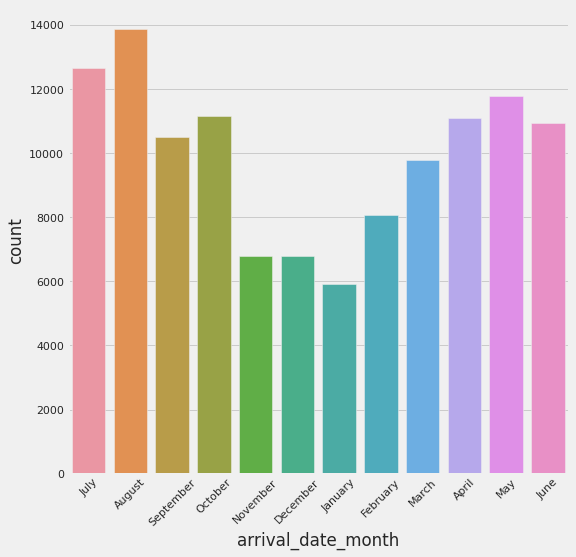

In [ ]:
sns.countplot(da['arrival_date_month'])
plt.xticks(rotation=45)
plt.show()
#booking is lowest from november to February and peeking in July and August

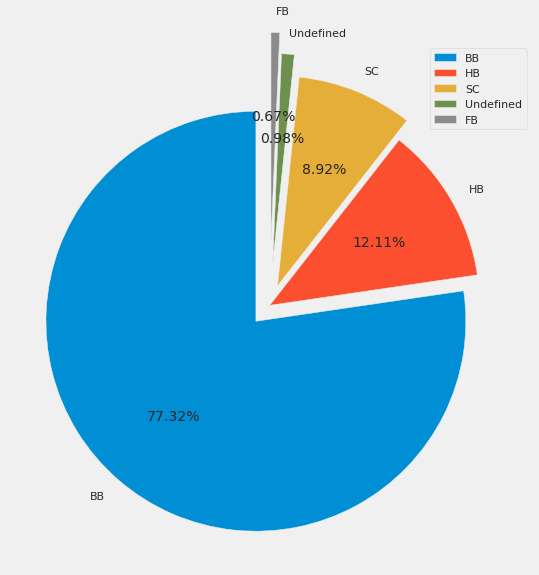

In [ ]:
meal = ["BB", "HB", "SC", "Undefined", "FB"]
values = da.meal.value_counts()
plt.figure(figsize = (15, 9))
plt.pie(values, labels = meal, explode = (0.1, 0, 0.1, 0.2, 0.3), autopct = "%.2f%%",startangle = 90)
plt.legend()
plt.show();
#We can conclude from here that most of the customers prefer BB (Bed & Breakfast).

,value_counts
Transient,89613
Transient-Party,25124
Contract,4076
Group,577


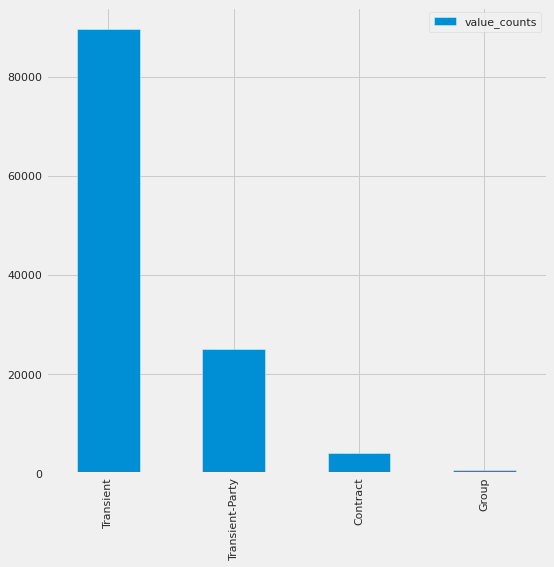

In [ ]:
da["customer_type"][da["is_canceled"] >= 0].agg(["value_counts"]).plot(kind = "bar");
da["customer_type"][da["is_canceled"] >= 0].agg(["value_counts"])

#Transient customer type are more likely to cancel the booking more than the other types.
